<a href="https://colab.research.google.com/github/ibonetc/Data_Analytics/blob/main/DeepLearning/IA_DL_Ejemplo_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejemplo sencillo utilizando TensorFlow

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)
print(tf.keras.__version__)

2.11.0
2.11.0


## Base de datos MNIST

<table>
  <tr>
    <th>Label</th>    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>    <td>Ankle boot</td>
  </tr>
</table>

In [ ]:
fashion_mnist=keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
test_images.shape

(10000, 28, 28)

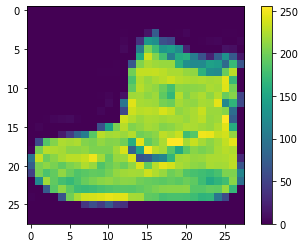

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

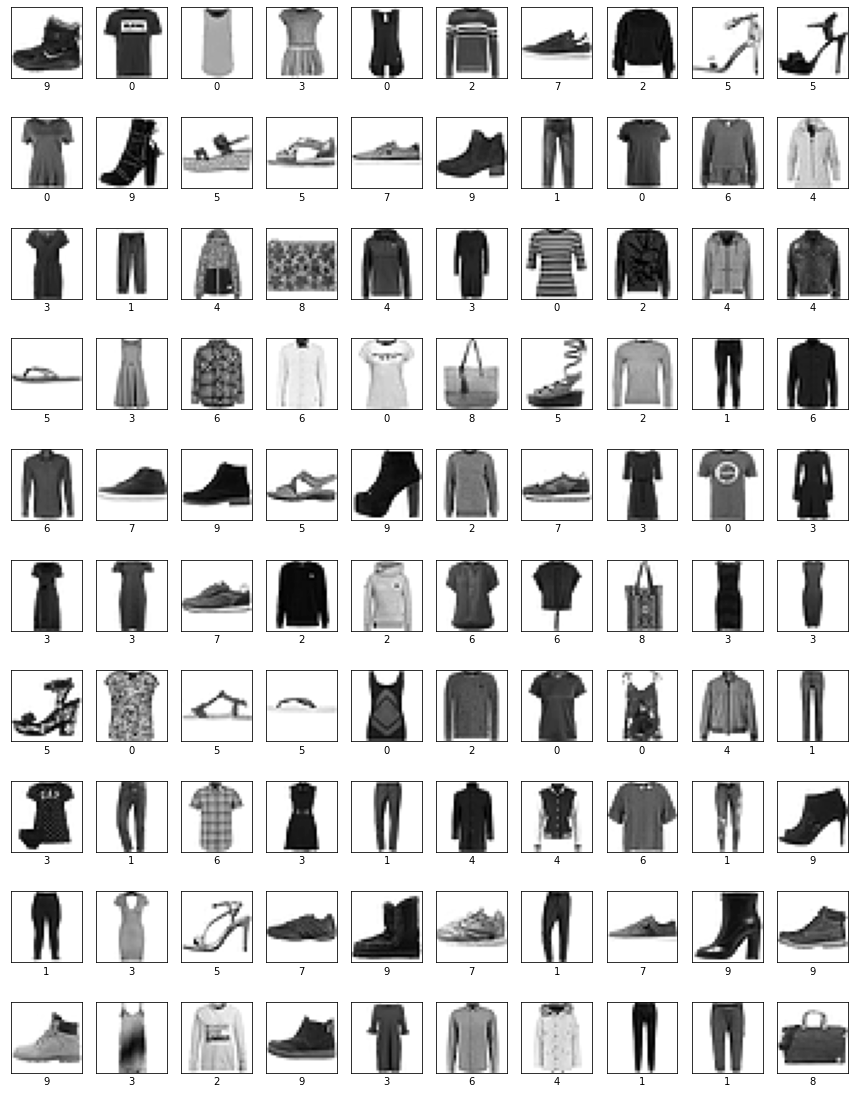

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])

In [ ]:
class_names_english=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
class_names= ['Camiseta/top', 'Pantalón', 'Suéter', 'Vestido', 'Abrigo',
               'Sandalia', 'Camisa', 'Tenis', 'Bolsa', 'Botín']

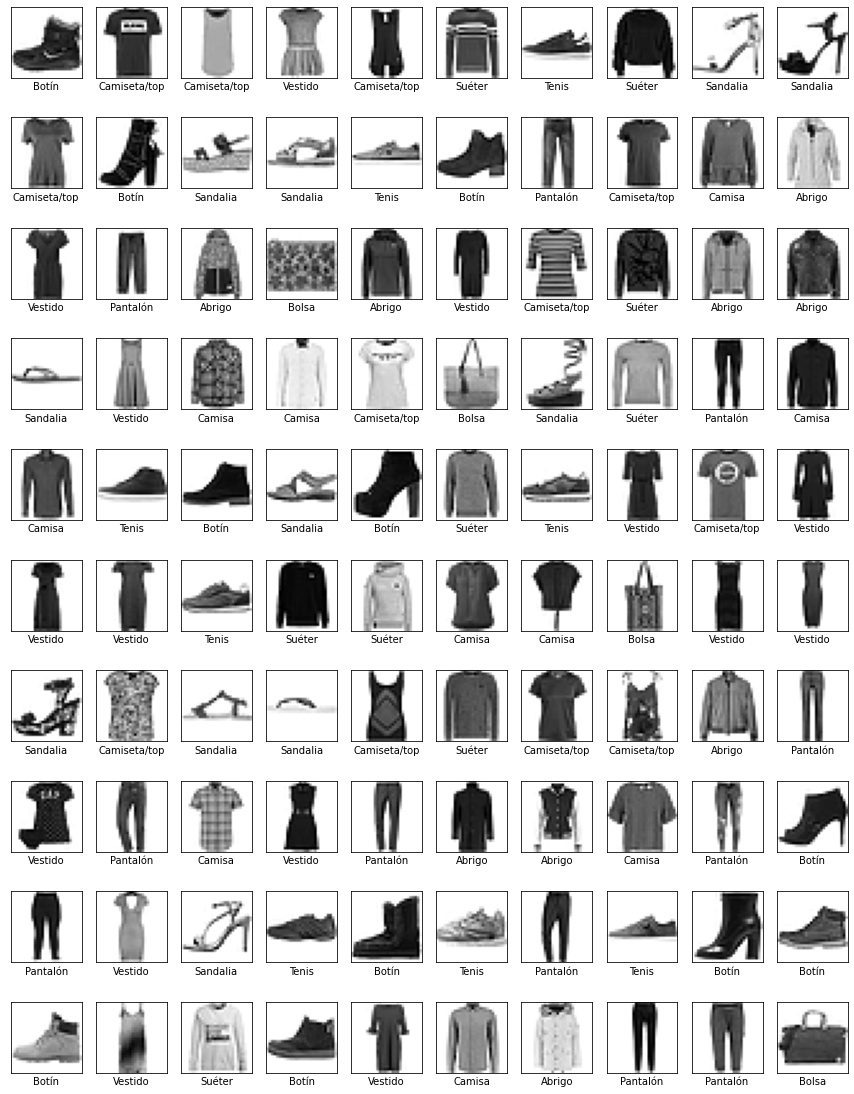

In [ ]:
plt.figure(figsize=(15,20))
for i in range(100):
  plt.subplot(10,10,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

## Estandarizar las imágenes
Llevar las imágenes a escala de 0 a 1

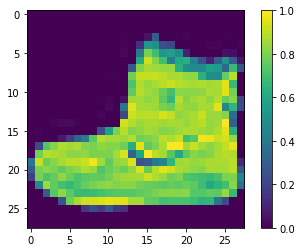

In [ ]:
plt.figure()
plt.imshow(train_images[0]/255)
plt.colorbar()
plt.show()

In [ ]:
train_imagesN=train_images/255
test_imagesN=test_images/255

In [ ]:
train_imagesN[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Construir un modelo de red neuronal: Simulando con capas Dense un MLP

Utilizando la API Sequential (Sequential Model)

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Sequential
from tensorflow.keras.utils import plot_model

In [ ]:
model = Sequential([
                    Flatten(input_shape=(28,28)),
                    Dense(128, activation=tf.nn.relu),
                    Dense(10,activation=tf.nn.softmax)
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


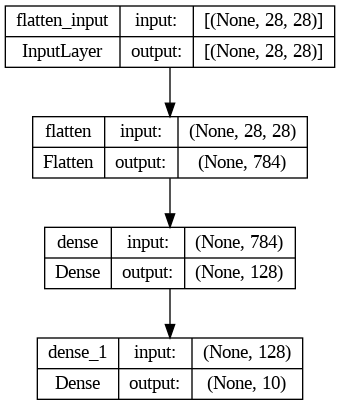

In [ ]:
plot_model(model,show_shapes=True)

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               100480    
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Crear modelo con la API Functional (Functional Model)

In [ ]:
from tensorflow.keras import Model
from tensorflow.keras import Input

In [ ]:
x_in= Input(shape=(28,28))
x1=Flatten()(x_in)
x2=Dense(128,activation=tf.nn.relu)(x1)
x_out=Dense(10,activation=tf.nn.softmax)(x2)
model=Model(inputs=x_in,outputs=x_out)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Definir el algoritmo de aprendizaje y las métricas a medir

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

Entrenar el modelo

In [ ]:
history=model.fit(train_imagesN,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.4965 - acc: 0.8256
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3732 - acc: 0.8640
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3376 - acc: 0.8759
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3127 - acc: 0.8843
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2936 - acc: 0.8922
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2811 - acc: 0.8957
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2683 - acc: 0.9003
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2568 - acc: 0.9043
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2484 - acc: 0.9074
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2395 - acc: 0.9113


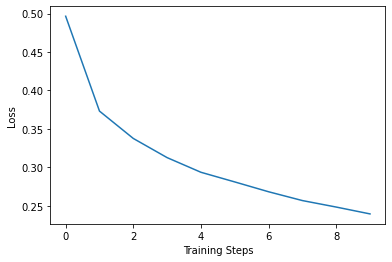

In [ ]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Training Steps')
plt.plot(history.history['loss'])

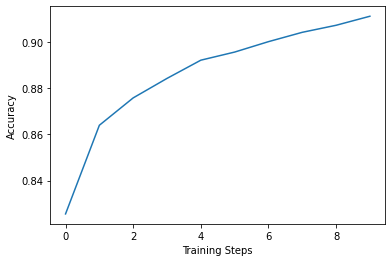

In [ ]:
plt.figure()
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')
plt.plot(history.history['acc'])

In [ ]:
class CollectBatch(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses=[]
    self.batch_accuracy=[]

  def on_batch_end(self,batch,logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_accuracy.append(logs['acc'])

batch_stats=CollectBatch()

In [ ]:
history=model.fit(train_imagesN,train_labels,epochs=5, callbacks=[batch_stats])

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2303 - acc: 0.9143
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2229 - acc: 0.9161
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2168 - acc: 0.9185
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2115 - acc: 0.9212
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2039 - acc: 0.9239


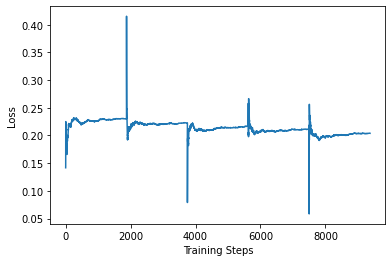

In [ ]:
plt.figure()
plt.ylabel('Loss')
plt.xlabel('Training Steps')
plt.plot(batch_stats.batch_losses)

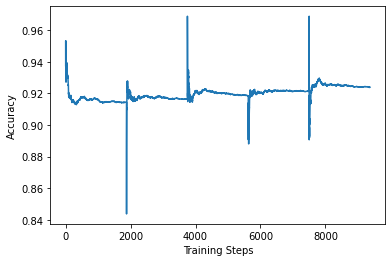

In [ ]:
plt.figure()
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')
plt.plot(batch_stats.batch_accuracy)

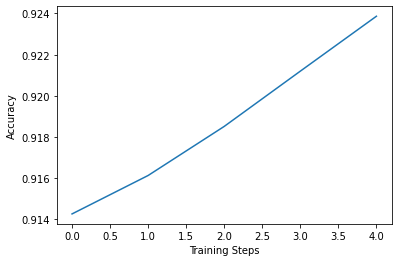

In [ ]:
plt.figure()
plt.ylabel('Accuracy')
plt.xlabel('Training Steps')
plt.plot(history.history['acc'])

In [ ]:
test_loss, test_acc=model.evaluate(test_imagesN,test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.3428 - acc: 0.8878


In [ ]:
predictions=model.predict(test_imagesN)

In [ ]:
predictions[0]

array([1.3380570e-09, 1.1947954e-10, 2.2546520e-11, 2.7036863e-13,
       4.4015302e-11, 4.7765508e-05, 1.3145512e-09, 2.8077203e-03,
       3.9111457e-11, 9.9714452e-01], dtype=float32)

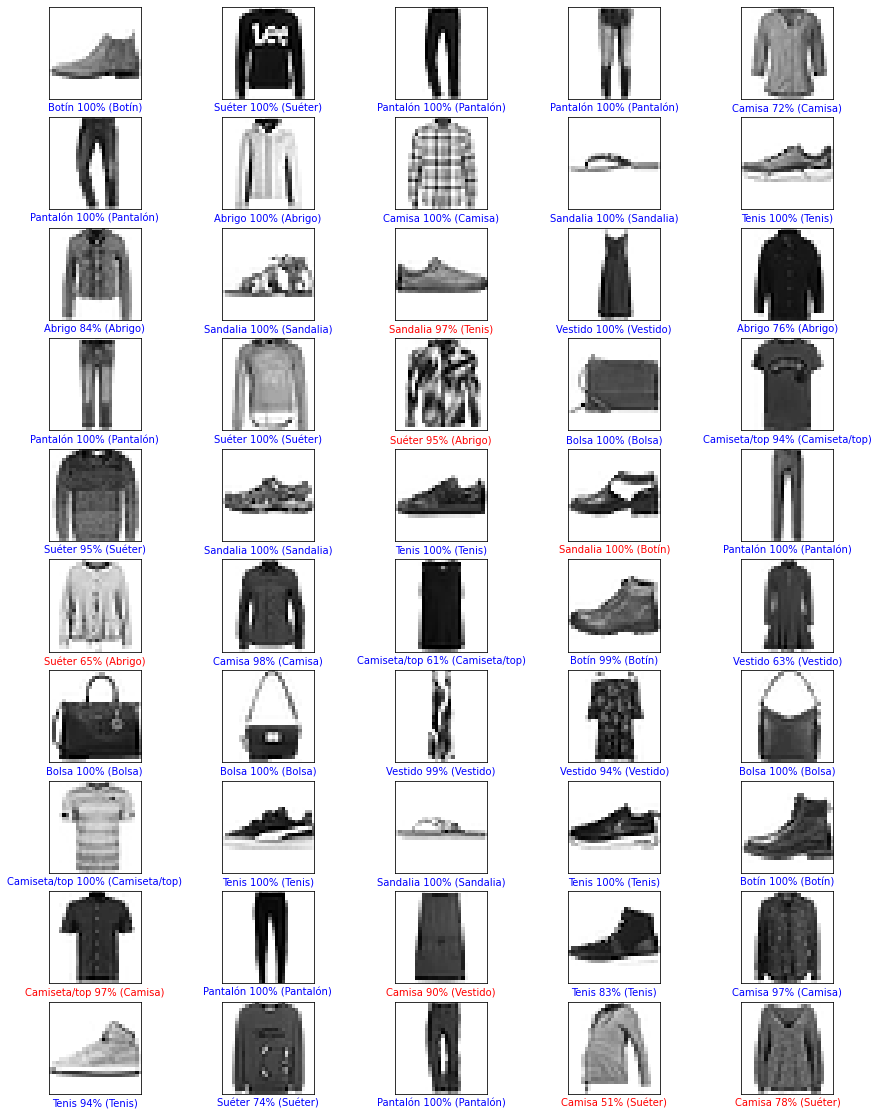

In [ ]:
plt.figure(figsize=(15,20))
for i in range(50):
  plt.subplot(10,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(test_imagesN[i], cmap=plt.cm.binary)
  predict_label=np.argmax(predictions[i])
  color= 'blue' if predict_label == test_labels[i] else 'red'
  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predict_label],
                                       100*np.max(predictions[i]),
                                       class_names[test_labels[i]]),
             color=color
             )
plt.show()

## Predecir una sola imagen

In [ ]:
train_imagesN.shape

(60000, 28, 28)

In [ ]:
img=test_imagesN[0]
img.shape

(28, 28)

In [ ]:
img=(np.expand_dims(img,0))
img.shape

(1, 28, 28)

In [ ]:
prediction_s=model.predict(img)
prediction_s

array([[1.3380544e-09, 1.1947862e-10, 2.2546433e-11, 2.7036915e-13,
        4.4015219e-11, 4.7765549e-05, 1.3145512e-09, 2.8077217e-03,
        3.9111679e-11, 9.9714452e-01]], dtype=float32)

In [ ]:
class_names[np.argmax(prediction_s)]

'Botín'

### Guardar el modelo

In [ ]:
model.save('/content/drive/MyDrive/Fotos_Pruebas/modelMINST.h5')

### Volver a cargar el modelo

In [ ]:
new_model= tf.keras.models.load_model('/content/drive/MyDrive/Fotos_Pruebas/modelMINST.h5')
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               100480    
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
loss1,acc1=model.evaluate(train_imagesN,train_labels)
loss2,acc2=new_model.evaluate(train_imagesN, train_labels)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.1914 - acc: 0.9277


## Otro ejemplo de modelo: Con capas convolucionales

In [ ]:
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D

In [ ]:
train_imagesN.shape

(60000, 28, 28)

In [ ]:
x_train_c=train_imagesN.reshape(train_imagesN.shape[0],train_imagesN.shape[1],train_imagesN.shape[2],1)
x_test_c=test_imagesN.reshape(test_imagesN.shape[0],test_imagesN.shape[1],test_imagesN.shape[2],1)

In [ ]:
x_train_c.shape

(60000, 28, 28, 1)

In [ ]:
modelc=Sequential()
modelc.add(Conv2D(32,kernel_size=(3,3),input_shape=(x_test_c.shape[1:4])))
modelc.add(Conv2D(32,kernel_size=(3,3)))
modelc.add(MaxPooling2D(pool_size=(2,2)))
modelc.add(Flatten())
modelc.add(Dense(128, activation=tf.nn.relu))
modelc.add(Dropout(0.2))
modelc.add(Dense(10, activation=tf.nn.softmax))

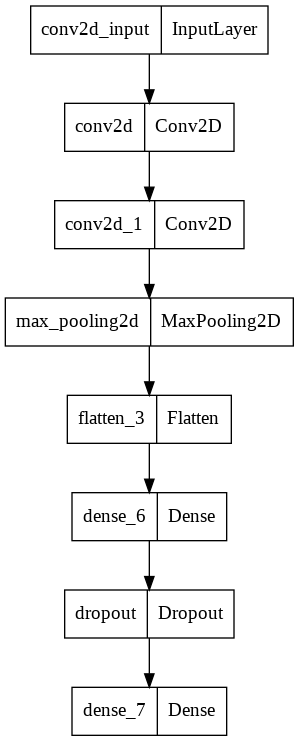

In [ ]:
plot_model(modelc)

In [ ]:
modelc.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['acc','mse'])

In [ ]:
history=modelc.fit(x_train_c,train_labels, epochs=35)

Epoch 1/35
1875/1875 [==============================] - 23s 8ms/step - loss: 0.4076 - acc: 0.8536 - mse: 27.6792
Epoch 2/35
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2749 - acc: 0.9004 - mse: 27.6857
Epoch 3/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2325 - acc: 0.9145 - mse: 27.6879
Epoch 4/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.2011 - acc: 0.9252 - mse: 27.6894
Epoch 5/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1748 - acc: 0.9347 - mse: 27.6907
Epoch 6/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1573 - acc: 0.9409 - mse: 27.6918
Epoch 7/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1401 - acc: 0.9469 - mse: 27.6926
Epoch 8/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1305 - acc: 0.9520 - mse: 27.6932
Epoch 9/35
1875/1875 [==============================] - 16s 8ms/step - loss: 0.1204 - acc: 0.954

In [ ]:
test_loss, test_acc, test_mse= modelc.evaluate(x_test_c, test_labels)

313/313 [==============================] - 2s 5ms/step - loss: 0.5252 - acc: 0.9122 - mse: 27.6962


## Uso de redes entrenadas

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input,decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils

In [ ]:
model = VGG16(weights='imagenet')
model.summary()

553476096/553467096 [==============================] - 5s 0us/step
Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
fileImage='/content/drive/MyDrive/Fotos_Pruebas/cisneNegro.jpg'

(-0.5, 223.5, 223.5, -0.5)

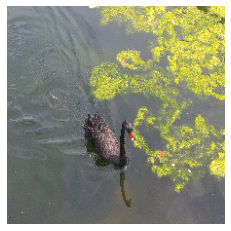

In [ ]:
img=load_img(fileImage,target_size=(224,224))
plt.imshow(img)
plt.axis('off')

In [ ]:
img=img_to_array(img)
img=np.expand_dims(img, axis=0)
img=preprocess_input(img)

In [ ]:
img.shape

(1, 224, 224, 3)

In [ ]:
y=model.predict(img)

In [ ]:
label_p=decode_predictions(y)

49152/35363 [=========================================] - 0s 0us/step


In [ ]:
label_p

[[('n01698640', 'American_alligator', 0.13828854),
  ('n01737021', 'water_snake', 0.07616808),
  ('n01860187', 'black_swan', 0.05475618),
  ('n02177972', 'weevil', 0.031755824),
  ('n02013706', 'limpkin', 0.03078671)]]

In [ ]:
decode_predictions(y, top=10)

[[('n01698640', 'American_alligator', 0.13828854),
  ('n01737021', 'water_snake', 0.07616808),
  ('n01860187', 'black_swan', 0.05475618),
  ('n02177972', 'weevil', 0.031755824),
  ('n02013706', 'limpkin', 0.03078671),
  ('n02113799', 'standard_poodle', 0.021718236),
  ('n02099429', 'curly-coated_retriever', 0.0208894),
  ('n01629819', 'European_fire_salamander', 0.01948271),
  ('n02018207', 'American_coot', 0.019114945),
  ('n02002724', 'black_stork', 0.018416468)]]

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
model=VGG19()
model.summary()

574726144/574710816 [==============================] - 5s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
y=model.predict(img)
decode_predictions(y,top=10)

[[('n01860187', 'black_swan', 0.122094),
  ('n01698640', 'American_alligator', 0.073183924),
  ('n02099429', 'curly-coated_retriever', 0.06496397),
  ('n01667778', 'terrapin', 0.063531496),
  ('n02133161', 'American_black_bear', 0.0431625),
  ('n01667114', 'mud_turtle', 0.039752163),
  ('n02177972', 'weevil', 0.03798213),
  ('n02102973', 'Irish_water_spaniel', 0.03485398),
  ('n02018207', 'American_coot', 0.029799683),
  ('n10565667', 'scuba_diver', 0.019532898)]]

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input,decode_predictions

In [ ]:
model=ResNet50()
model.summary()

102981632/102967424 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                        

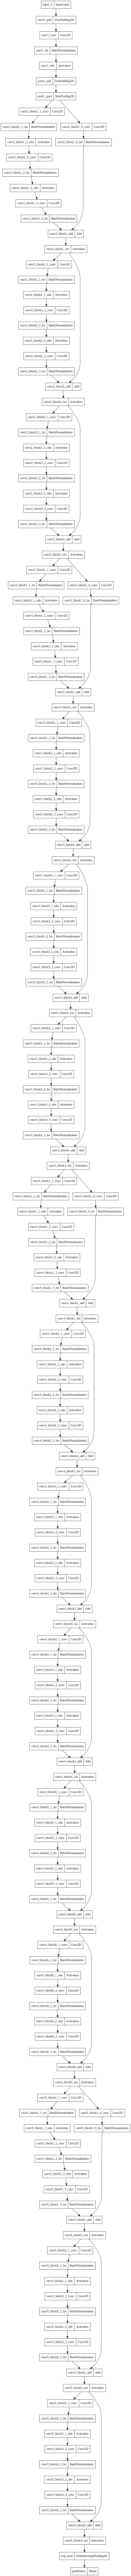

In [ ]:
plot_model(model)

In [ ]:
y=model.predict(img)
decode_predictions(y,top=10)

[[('n10565667', 'scuba_diver', 0.38180333),
  ('n09256479', 'coral_reef', 0.085111775),
  ('n11879895', 'rapeseed', 0.08263253),
  ('n01978455', 'rock_crab', 0.05888603),
  ('n02099429', 'curly-coated_retriever', 0.026156347),
  ('n04251144', 'snorkel', 0.024304645),
  ('n04204347', 'shopping_cart', 0.02351814),
  ('n01667114', 'mud_turtle', 0.022938708),
  ('n01698640', 'American_alligator', 0.019427119),
  ('n02643566', 'lionfish', 0.01629632)]]

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3,preprocess_input,decode_predictions

In [ ]:
model=InceptionV3(weights='imagenet')
model.summary()

96124928/96112376 [==============================] - 1s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_2 (Conv2D)              (None, 149, 149, 32  864         ['input_5[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 149, 149, 32  96         ['conv2d_2[0][0]']               
 alization)           

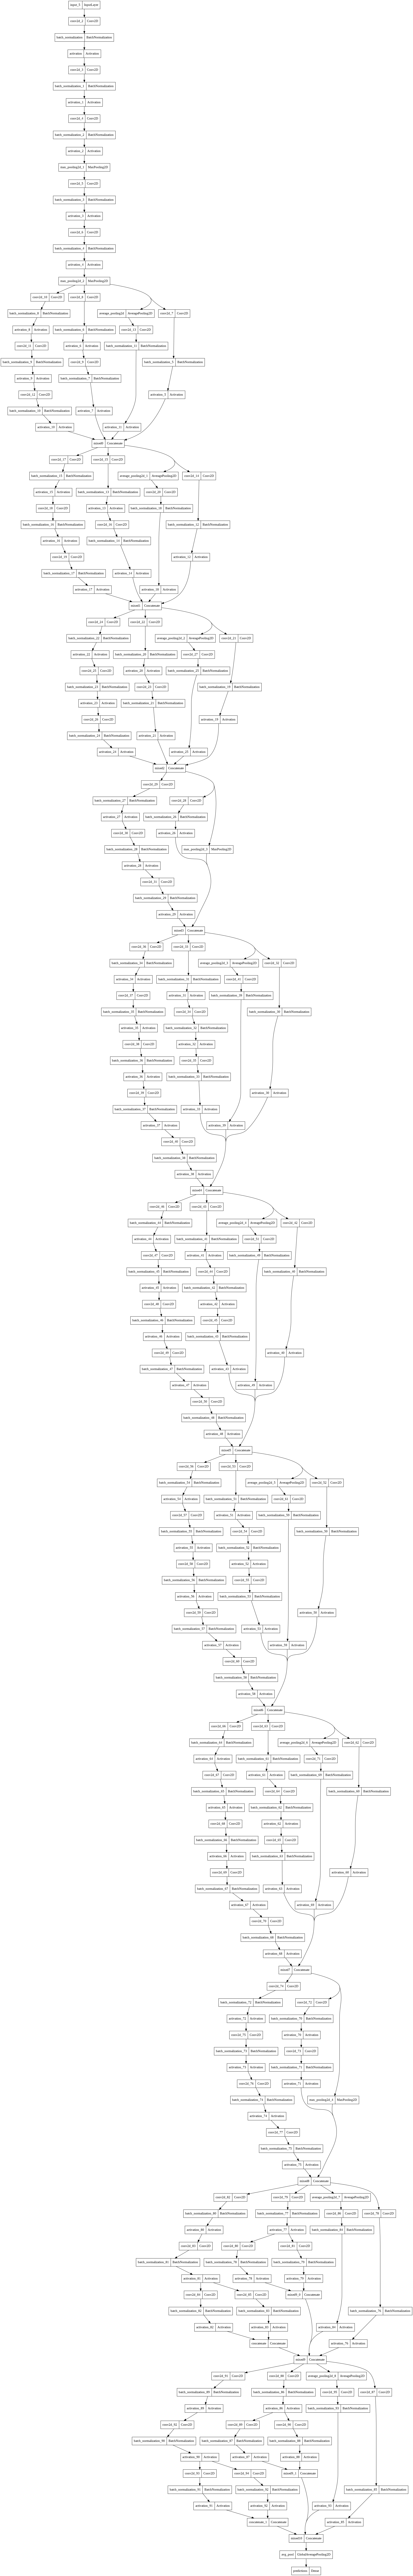

In [ ]:
plot_model(model)

In [ ]:
img=load_img(fileImage,target_size=(299,299))
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
x=preprocess_input(x)


In [ ]:
x.shape

(1, 299, 299, 3)

In [ ]:
y=model.predict(x)
decode_predictions(y, top=10)

[[('n01860187', 'black_swan', 0.32577518),
  ('n02037110', 'oystercatcher', 0.13390689),
  ('n02018207', 'American_coot', 0.04730085),
  ('n02013706', 'limpkin', 0.01712272),
  ('n02017213', 'European_gallinule', 0.013221442),
  ('n02002724', 'black_stork', 0.012968579),
  ('n02526121', 'eel', 0.004995784),
  ('n02028035', 'redshank', 0.0038308168),
  ('n01847000', 'drake', 0.0037385875),
  ('n09332890', 'lakeside', 0.003145166)]]